Created on Wed Dec 7 09:53: 21 2022

@author: Ipsit Sahoo

ASU Id: 1224872415


In [4]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# Read data set
file_path = "../data/car.data"
dataset_columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "sale_condition"]
df_data = pd.read_csv(file_path)

print("Data type: ", type(df_data), "Data Shape:", df_data.shape)

Data type:  <class 'pandas.core.frame.DataFrame'> Data Shape: (1727, 7)


In [6]:
# Head
columns = df_data.columns

res = dict()

for i in range(0, len(columns)):
    res[columns[i]] = dataset_columns[i]

df_data = df_data.rename(columns=res)

## Label Data

In [7]:
le = preprocessing.LabelEncoder()

df_data_label_encoded = df_data.copy()

df_data_label_encoded.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'sale_condition'],
      dtype='object')

In [8]:
# Label Buying

df_data_label_encoded['buying'] = le.fit_transform(df_data['buying'])
df_data_label_encoded['maint'] = le.fit_transform(df_data['maint'])
df_data_label_encoded['doors'] = le.fit_transform(df_data['doors'])
df_data_label_encoded['persons'] = le.fit_transform(df_data['persons'])
df_data_label_encoded['lug_boot'] = le.fit_transform(df_data['lug_boot'])
df_data_label_encoded['safety'] = le.fit_transform(df_data['safety'])
df_data_label_encoded['sale_condition'] = le.fit_transform(df_data['sale_condition'])

df_data_label_encoded.head()

,buying,maint,doors,persons,lug_boot,safety,sale_condition
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [9]:
X = df_data_label_encoded.drop(columns=["sale_condition"])
X.head()

X = X.values

In [10]:
Y = df_data_label_encoded["sale_condition"]
Y = Y.values.reshape(-1, 1)
Y.shape

(1727, 1)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape : ", X_train.shape)
print("Y_train shape : ", Y_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_test shape : ", Y_test.shape)

X_train shape :  (1381, 6)
Y_train shape :  (1381, 1)
X_test shape :  (346, 6)
Y_test shape :  (346, 1)


## Decision Tree SK-learn using Entropy function

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, Y_train)

In [13]:
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9739884393063584

In [23]:
np.unique(df_data["sale_condition"].values)

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

Attribute: Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low'], dtype='object')
Class values: ['acc' 'good' 'unacc' 'vgood']


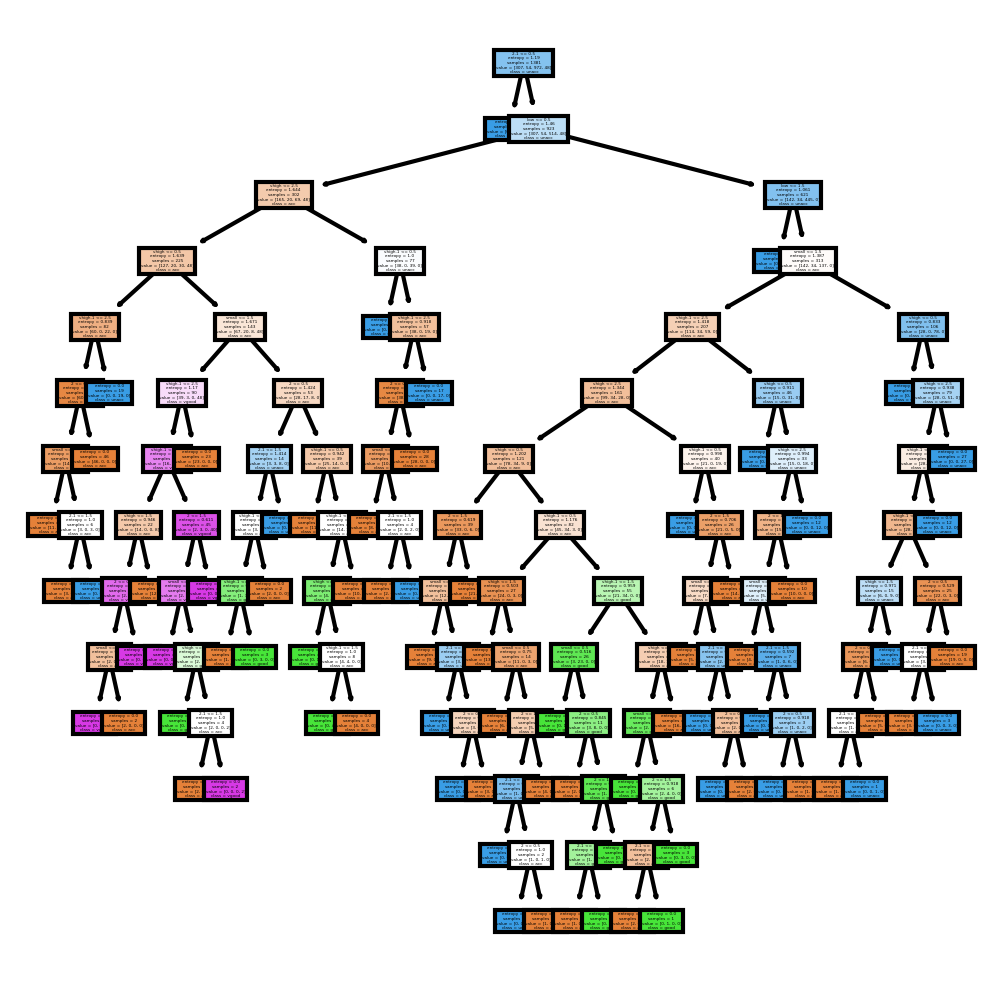

In [24]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

attr_columns = columns[:-1]
class_values = np.unique(df_data["sale_condition"].values)

print("Attribute:", attr_columns)
print("Class values:", class_values)

tree.plot_tree(clf,
           feature_names = attr_columns.values, 
           class_names=class_values,
           filled = True)
fig.savefig('imagename.png')